In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78737226/python-have-two-datasets-which-are-measuring-the-same-thing-how-can-i-fit-the?noredirect=1#comment138829962_78737226

In [7]:
def read(file, keys=['year', 'month', 'day', "hour"]):
    frame = pd.read_csv(file)
    frame["timestamp"] = pd.to_datetime(frame[keys])
    frame = frame.drop(keys, axis=1).set_index("timestamp")
    return frame

In [8]:
ch1 = read("channel1.csv")
ch2 = read("channel2.csv")

In [9]:
data = ch1.merge(ch2, left_index=True, right_index=True, suffixes=("_ref", "_exp"))
data[data < 0] = np.nan
data = data.resample("1h").interpolate()

In [10]:
def model(x, a, b):
    return a * x + b

In [15]:
popt, pcov = optimize.curve_fit(model, data["height_exp"], data["height_ref"])
popt, pcov

(array([ -773.39967406, 11645.38173753]),
 array([[  320.87174002, -3943.48160713],
        [-3943.48160713, 48563.90105644]]))

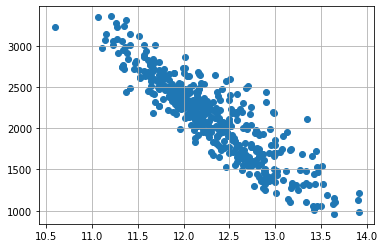

In [14]:
fig, axe = plt.subplots()
axe.scatter(data["height_exp"], data["height_ref"])
axe.grid()

In [16]:
data["height_fit"] = model(data["height_exp"], *popt)

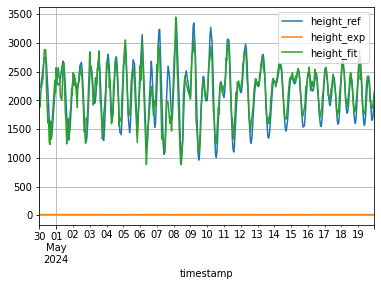

In [18]:
axe = data.plot()
axe.grid()